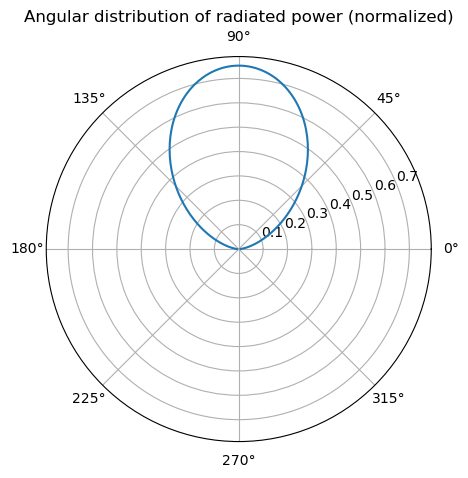

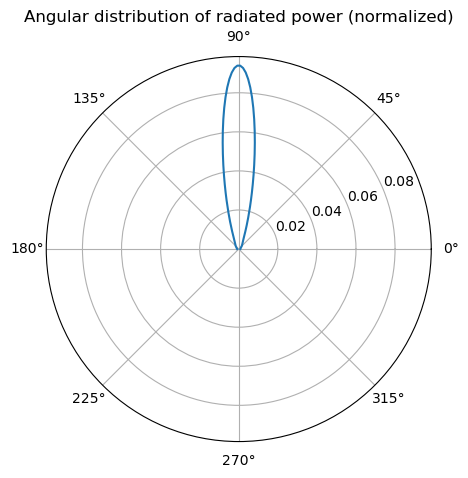

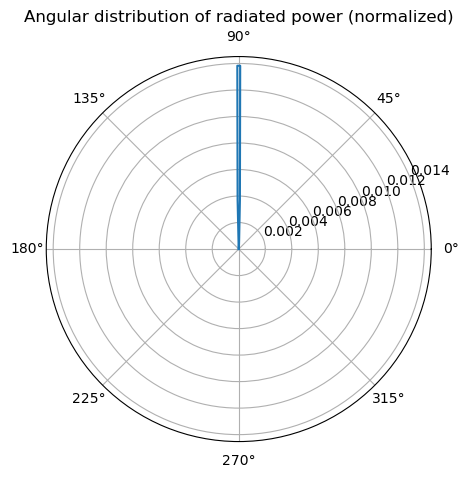

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.6e-19
c = 3e8

# Particle parameters
vx_values = [0.1*c,0.9*c,0.999*c]       # velocity along x
a_z = 0.3 * c       # acceleration along z
for v_x in vx_values:
# Beta and beta_dot
   beta = np.array([v_x/c, 0, 0])
   beta_dot = np.array([0, 0, a_z/c])

# Angular grid
   theta = np.linspace(0, np.pi, 200)       # polar angle
   phi = np.linspace(0, 2*np.pi, 200)       # azimuthal angle
   Theta, Phi = np.meshgrid(theta, phi)

# Unit vector n
   n_x = np.sin(Theta) * np.cos(Phi)
   n_y = np.sin(Theta) * np.sin(Phi)
   n_z = np.cos(Theta)
   n_vec = np.stack([n_x, n_y, n_z], axis=-1)   # shape (Nphi, Ntheta, 3)
# Compute dP/dOmega
   cross_term = np.cross(n_vec - beta, beta_dot)
   numerator = np.linalg.norm(np.cross(n_vec, cross_term), axis=-1)**2
   denominator = (1 - np.tensordot(n_vec, beta, axes=([2],[0])) )**5
   dP_dOmega = (q**2 / (4*np.pi*c)) * numerator / denominator
  
# Normalize for plotting
   dP_dOmega /= np.max(dP_dOmega)

# Plot polar distribution in theta (integrated over phi)
   dP_theta = np.mean(dP_dOmega, axis=0)
   plt.figure(figsize=(7,5))
   plt.polar(theta, dP_theta)
   plt.title("Angular distribution of radiated power (normalized)")
plt.show()

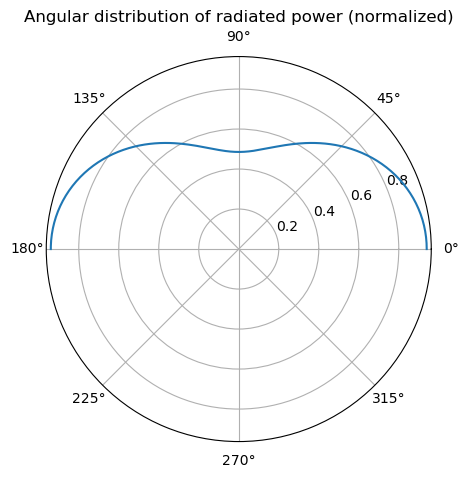

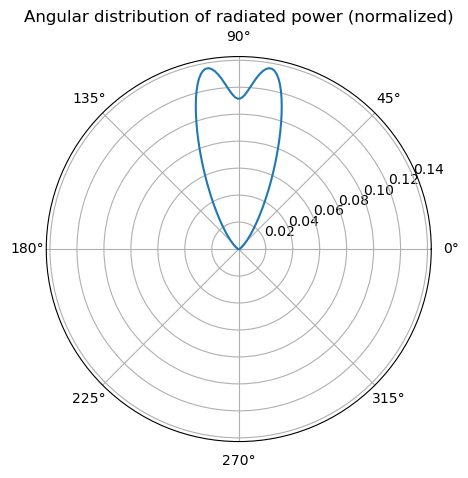

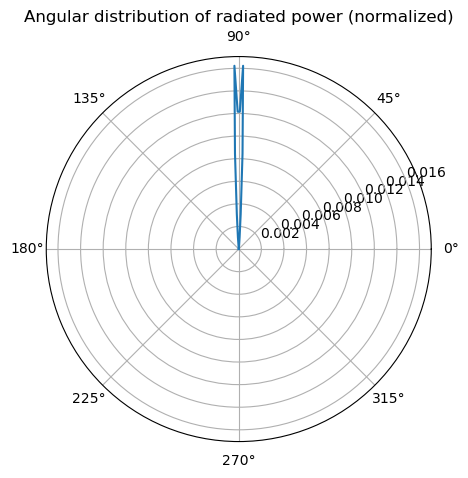

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.6e-19
c = 3e8

# velocity and acceleration of charged particle
vx_values = [0.1*c,0.9*c,0.999*c]      # velocity along x
a_x = 0.9 * c       # acceleration along x
for v_x in vx_values:
# Beta and beta_dot
  beta = np.array([v_x/c, 0, 0])
  beta_dot = np.array([a_x/c, 0, 0])

# Angular grid
  theta = np.linspace(0, np.pi, 200)       # polar angle
  phi = np.linspace(0, 2*np.pi, 200)       # azimuthal angle
  Theta, Phi = np.meshgrid(theta, phi)

# Unit vector n
  n_x = np.sin(Theta) * np.cos(Phi)
  n_y = np.sin(Theta) * np.sin(Phi)
  n_z = np.cos(Theta)
  n_vec = np.stack([n_x, n_y, n_z], axis=-1)   # shape (Nphi, Ntheta, 3)
# Compute dP/dOmega
  cross_term = np.cross(n_vec - beta, beta_dot)
  numerator = np.linalg.norm(np.cross(n_vec, cross_term), axis=-1)**2
  denominator = (1 - np.tensordot(n_vec, beta, axes=([2],[0])) )**5
  dP_dOmega = (q**2 / (4*np.pi*c)) * numerator / denominator

# Normalize for plotting
  dP_dOmega /= np.max(dP_dOmega)

# Plot polar distribution in theta (integrated over phi)
  dP_theta = np.mean(dP_dOmega, axis=0)
  plt.figure(figsize=(7,5))
  plt.polar(theta, dP_theta)
  plt.title("Angular distribution of radiated power (normalized)")
plt.show()
